In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bs4, requests

In [39]:
import json

In [42]:
tax_df = pd.read_csv("Data/Gov/tax_collection_for_the_month_february_2023.csv")
tax_df

,SL. No,Month,Goods & Service Tax for the year 2022-23(Rs in Crore),Karnataka Sales Tax for the year 2022-23(Rs in Crore),Profession Tax for the year 2022-23(Rs in Crore)
0,1,April,5205.60,1602.64,163.36
1,2,May,12814.71,1635.32,106.87
2,3,June,5229.47,1689.18,99.67
3,4,July,4721.38,1645.65,103.87
4,5,August,4627.45,1462.02,102.14
5,6,September,4612.92,1505.59,107.21
6,7,October,6535.64,1459.80,104.56
7,8,November,6853.53,1524.27,108.08
8,9,December,5217.78,1585.95,107.68
9,10,January,5736.64,1716.53,108.00


In [48]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SL. No                                                  12 non-null     int64  
 1   Month                                                   12 non-null     object 
 2   Goods & Service Tax for the year 2022-23(Rs in Crore)   11 non-null     float64
 3    Karnataka Sales Tax for the year 2022-23(Rs in Crore)  11 non-null     float64
 4   Profession Tax for the  year 2022-23(Rs in Crore)       11 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 608.0+ bytes


In [64]:
tax_df.describe()

,SL. No,Goods & Service Tax for the year 2022-23(Rs in Crore),Karnataka Sales Tax for the year 2022-23(Rs in Crore),Profession Tax for the year 2022-23(Rs in Crore)
count,12.000000,11.000000,11.000000,11.000000
mean,6.500000,6951.600909,1591.527273,110.776364
std,3.605551,3525.279490,91.650028,17.650434
min,1.000000,4612.920000,1459.800000,99.670000
25%,3.750000,4963.490000,1514.930000,104.215000
50%,6.500000,5229.470000,1602.640000,107.100000
75%,9.250000,6694.585000,1662.750000,107.840000
max,12.000000,14912.490000,1716.530000,163.360000


In [68]:
tax_df.isnull().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    3
dtype: int64

In [69]:
tax_df_2= tax_df.dropna(inplace=False)

In [73]:
tax_df_2.sum()

SL. No                                                                                                   66
Month                                                     AprilMayJuneJulyAugustSeptemberOctoberNovember...
Goods & Service Tax for the year 2022-23(Rs in Crore)                                              76467.61
 Karnataka Sales Tax for the year 2022-23(Rs in Crore)                                              17506.8
Profession Tax for the  year 2022-23(Rs in Crore)                                                   1218.54
dtype: object

In [51]:
tax_df.set_index(keys='SL. No')

,Month,Goods & Service Tax for the year 2022-23(Rs in Crore),Karnataka Sales Tax for the year 2022-23(Rs in Crore),Profession Tax for the year 2022-23(Rs in Crore)
SL. No,,,,
1,April,5205.60,1602.64,163.36
2,May,12814.71,1635.32,106.87
3,June,5229.47,1689.18,99.67
4,July,4721.38,1645.65,103.87
5,August,4627.45,1462.02,102.14
6,September,4612.92,1505.59,107.21
7,October,6535.64,1459.80,104.56
8,November,6853.53,1524.27,108.08
9,December,5217.78,1585.95,107.68


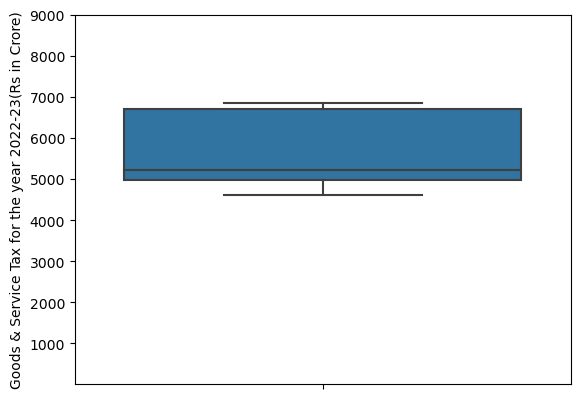

In [62]:
sns.boxplot(y='Goods & Service Tax for the year 2022-23(Rs in Crore)', data=tax_df)
plt.ylim((10, 9000))
plt.show()

In [101]:
PMMSY = json.load(open('./Data/Pradhan Mantri Matsya Sampada Yojana/PMMSY_2022_2023.json'))
PMMSY_df = pd.DataFrame(PMMSY['data'])
PMMSY_df

,State/UT Name,Financial Year,Component,Name of the Sub-Activity,Ha/No,Sanctioned Units,Total Project Cost(â‚¹ In Lakh)
0,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Acquisition of Deep-sea fishing vessels,No,2,240
1,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Cold storage /Ice Plant Modernization,No,1,50
2,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Ice Plant/Cold Storage of 10-ton capacity,No,2,80
3,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Inputs for fresh water Aquaculture,Ha,6,24
4,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Motor cycle with Ice Box,No,40,30.00
5,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),New Freshwater Finfish Hatcheries,No,3,75
6,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),New Grow-out ponds,Ha,6,42
7,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),New Rearing ponds,Ha,2,14
8,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Refrigerated vehicles,No,1,25
9,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Non-Beneficiary Or...,Multipurpose Support Services - Sagar Mitra,No,70,126


In [104]:
PMMSY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State/UT Name                    10 non-null     object
 1   Financial Year                   10 non-null     object
 2   Component                        10 non-null     object
 3   Name of the Sub-Activity         10 non-null     object
 4   Ha/No                            10 non-null     object
 5   Sanctioned Units                 10 non-null     object
 6   Total Project Cost(â‚¹ In Lakh)  10 non-null     object
dtypes: object(7)
memory usage: 688.0+ bytes


In [117]:
PMMSY_df = PMMSY_df.astype(dtype={'Sanctioned Units': int, 'Total Project Cost(â‚¹ In Lakh)': float})
PMMSY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State/UT Name                    10 non-null     object 
 1   Financial Year                   10 non-null     object 
 2   Component                        10 non-null     object 
 3   Name of the Sub-Activity         10 non-null     object 
 4   Ha/No                            10 non-null     object 
 5   Sanctioned Units                 10 non-null     int32  
 6   Total Project Cost(â‚¹ In Lakh)  10 non-null     float64
dtypes: float64(1), int32(1), object(5)
memory usage: 648.0+ bytes


In [118]:
PMMSY_df.sum()

State/UT Name                      Andaman and Nicobar IslandsAndaman and Nicobar...
Financial Year                     2022-232022-232022-232022-232022-232022-232022...
Component                          Centrally Sponsored Scheme (Beneficiary Orient...
Name of the Sub-Activity           Acquisition of Deep-sea fishing vesselsCold st...
Ha/No                                                           NoNoNoHaNoNoHaHaNoNo
Sanctioned Units                                                                 133
Total Project Cost(â‚¹ In Lakh)                                                706.0
dtype: object

In [100]:
with open('./Data/Pradhan Mantri Matsya Sampada Yojana/PMMSY_2022_2023.json') as project_file:    
    data = json.load(project_file)  

df = pd.json_normalize(data)
df['data']

0    [{'State/UT Name': 'Andaman and Nicobar Island...
Name: data, dtype: object

In [45]:
data = {"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Acquisition of Deep-sea fishing vessels","Ha/No":"No","Sanctioned Units":"2","Total Project Cost(₹ In Lakh)":"240"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Cold storage /Ice Plant Modernization","Ha/No":"No","Sanctioned Units":"1","Total Project Cost(₹ In Lakh)":"50"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Ice Plant/Cold Storage of 10-ton capacity","Ha/No":"No","Sanctioned Units":"2","Total Project Cost(₹ In Lakh)":"80"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Inputs for fresh water Aquaculture","Ha/No":"Ha","Sanctioned Units":"6","Total Project Cost(₹ In Lakh)":"24"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Motor cycle with Ice Box","Ha/No":"No","Sanctioned Units":"40","Total Project Cost(₹ In Lakh)":"30.00"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"New Freshwater Finfish Hatcheries","Ha/No":"No","Sanctioned Units":"3","Total Project Cost(₹ In Lakh)":"75"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"New Grow-out ponds","Ha/No":"Ha","Sanctioned Units":"6","Total Project Cost(₹ In Lakh)":"42"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"New Rearing ponds","Ha/No":"Ha","Sanctioned Units":"2","Total Project Cost(₹ In Lakh)":"14"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Beneficiary Oriented)","Name of the Sub-Activity":"Refrigerated vehicles","Ha/No":"No","Sanctioned Units":"1","Total Project Cost(₹ In Lakh)":"25"},{"State/UT Name":"Andaman and Nicobar Islands","Financial Year":"2022-23","Component":"Centrally Sponsored Scheme (Non-Beneficiary Oriented)","Name of the Sub-Activity":"Multipurpose Support Services - Sagar Mitra","Ha/No":"No","Sanctioned Units":"70","Total Project Cost(₹ In Lakh)":"126"}

In [46]:
df = pd.DataFrame(data)

df.head()

,State/UT Name,Financial Year,Component,Name of the Sub-Activity,Ha/No,Sanctioned Units,Total Project Cost(₹ In Lakh)
0,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Acquisition of Deep-sea fishing vessels,No,2,240
1,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Cold storage /Ice Plant Modernization,No,1,50
2,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Ice Plant/Cold Storage of 10-ton capacity,No,2,80
3,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Inputs for fresh water Aquaculture,Ha,6,24
4,Andaman and Nicobar Islands,2022-23,Centrally Sponsored Scheme (Beneficiary Oriented),Motor cycle with Ice Box,No,40,30.00
